In [1]:
install.packages('rpart')
install.packages('randomForest')
install.packages('e1071')
library(caret)
library(rpart)
library(randomForest)
library(e1071)

set.seed(2017)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: lattice
Loading required package: ggplot2
randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin



In [2]:
data <- read.csv('seaflow_21min.csv')
head(data)

,file_id,time,cell_id,d1,d2,fsc_small,fsc_perp,fsc_big,pe,chl_small,chl_big,pop
1,203,12,1,25344,27968,34677,14944,32400,2216,28237,5072,pico
2,203,12,4,12960,22144,37275,20440,32400,1795,36755,14224,ultra
3,203,12,6,21424,23008,31725,11253,32384,1901,26640,0,pico
4,203,12,9,7712,14528,28744,10219,32416,1248,35392,10704,ultra
5,203,12,11,30368,21440,28861,6101,32400,12989,23421,5920,synecho
6,203,12,15,30032,22704,31221,13488,32400,1883,27323,6560,pico


In [3]:
summary(data)

    file_id           time          cell_id            d1       
 Min.   :203.0   Min.   : 12.0   Min.   :    0   Min.   : 1328  
 1st Qu.:204.0   1st Qu.:174.0   1st Qu.: 7486   1st Qu.: 7296  
 Median :206.0   Median :362.0   Median :14995   Median :17728  
 Mean   :206.2   Mean   :341.5   Mean   :15008   Mean   :17039  
 3rd Qu.:208.0   3rd Qu.:503.0   3rd Qu.:22401   3rd Qu.:24512  
 Max.   :209.0   Max.   :643.0   Max.   :32081   Max.   :54048  
       d2          fsc_small        fsc_perp        fsc_big     
 Min.   :   32   Min.   :10005   Min.   :    0   Min.   :32384  
 1st Qu.: 9584   1st Qu.:31341   1st Qu.:13496   1st Qu.:32400  
 Median :18512   Median :35483   Median :18069   Median :32400  
 Mean   :17437   Mean   :34919   Mean   :17646   Mean   :32405  
 3rd Qu.:24656   3rd Qu.:39184   3rd Qu.:22243   3rd Qu.:32416  
 Max.   :54688   Max.   :65424   Max.   :63456   Max.   :32464  
       pe          chl_small        chl_big           pop       
 Min.   :    0   Min.   :

In [4]:
trainIndex = createDataPartition(data$pop, p = 0.5, list = FALSE)
train <- data[trainIndex,]
test <- data[trainIndex,]

In [5]:
summary(train)

    file_id           time          cell_id            d1       
 Min.   :203.0   Min.   : 12.0   Min.   :    1   Min.   : 1328  
 1st Qu.:204.0   1st Qu.:174.0   1st Qu.: 7490   1st Qu.: 7328  
 Median :206.0   Median :360.0   Median :14988   Median :17728  
 Mean   :206.2   Mean   :341.4   Mean   :15007   Mean   :17046  
 3rd Qu.:208.0   3rd Qu.:504.0   3rd Qu.:22372   3rd Qu.:24480  
 Max.   :209.0   Max.   :643.0   Max.   :32081   Max.   :54048  
       d2          fsc_small        fsc_perp        fsc_big     
 Min.   :   32   Min.   :10005   Min.   :    0   Min.   :32384  
 1st Qu.: 9632   1st Qu.:31371   1st Qu.:13493   1st Qu.:32400  
 Median :18576   Median :35484   Median :18083   Median :32400  
 Mean   :17464   Mean   :34923   Mean   :17651   Mean   :32405  
 3rd Qu.:24656   3rd Qu.:39139   3rd Qu.:22240   3rd Qu.:32416  
 Max.   :54688   Max.   :65424   Max.   :62173   Max.   :32464  
       pe          chl_small        chl_big           pop       
 Min.   :    0   Min.   :

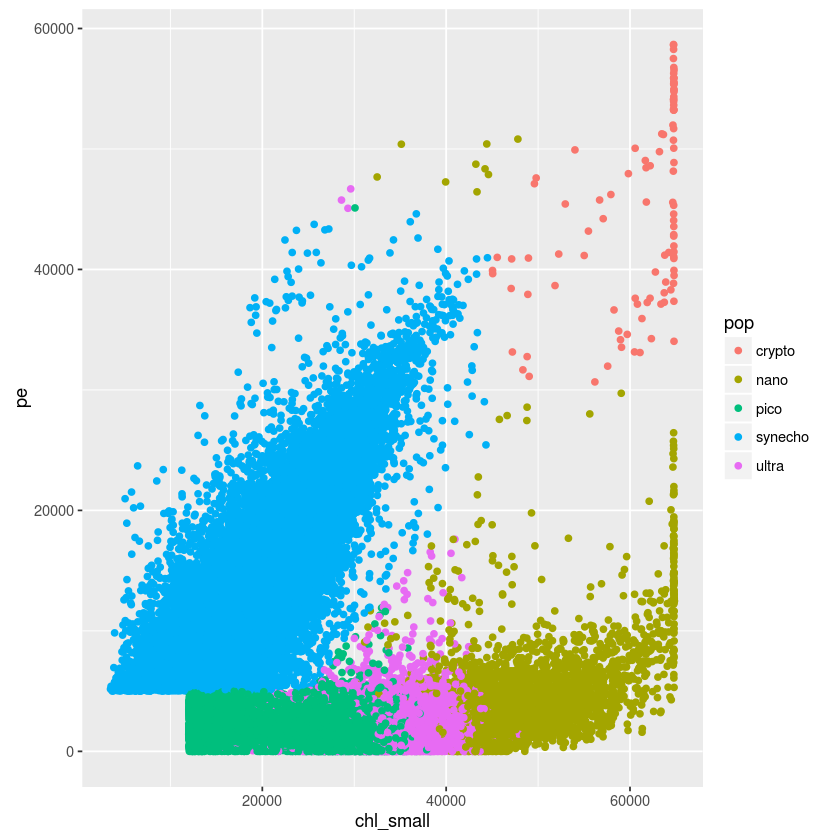

In [6]:
ggplot(data, aes(x = chl_small, y = pe)) + geom_point(aes(color = pop))

In [25]:
fol <- formula(pop ~ fsc_small + fsc_perp + fsc_big + pe + chl_big + chl_small)

In [8]:
model.tree <- rpart(fol, method="class", data=train)

In [9]:
print(model.tree)

n= 36172 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 36172 25742 pico (0.0014 0.18 0.29 0.25 0.28)  
   2) pe< 5004 26341 15960 pico (0 0.22 0.39 3.8e-05 0.38)  
     4) chl_small< 32308 11508  2031 pico (0 8.7e-05 0.82 8.7e-05 0.18) *
     5) chl_small>=32308 14833  6731 ultra (0 0.39 0.061 0 0.55)  
      10) chl_small>=41292 5243   685 nano (0 0.87 0.00019 0 0.13) *
      11) chl_small< 41292 9590  2172 ultra (0 0.13 0.094 0 0.77) *
   3) pe>=5004 9831   759 synecho (0.0052 0.053 0.005 0.92 0.014)  
     6) chl_small>=37689.5 652   140 nano (0.078 0.79 0 0.061 0.075) *
     7) chl_small< 37689.5 9179   147 synecho (0 0.00098 0.0053 0.98 0.0097) *


In [11]:
predictions.tree <- predict(model.tree, test, type = 'class')
head(predictions.tree)

1       3       4       5       6       7 
   pico    pico   ultra synecho    pico   ultra 
Levels: crypto nano pico synecho ultra

In [12]:
summary(predictions.tree)

crypto    nano    pico synecho   ultra 
      0    5895   11508    9179    9590

In [13]:
mean(predictions.tree == test$pop)

[1] 0.8569335

In [28]:
gc()
model.forest <- randomForest(fol, data=train)

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,1692677.0,90.4,2637877.0,140.9,2637877.0,140.9
Vcells,3399737,26,6541335,50,6540516,50


In [30]:
predictions.forest <- predict(model.forest, test)
mean(predictions.forest == test$pop)

[1] 1

In [24]:
importance(model.forest)

,MeanDecreaseGini
fsc_small,2772.923
fsc_perp,2045.204
fsc_big,203.4745
pe,8833.081
chl_big,4790.481
chl_small,8209.967


In [17]:
model.svm <- svm(fol, data=train)

In [18]:
predictions.svm <- predict(model.svm, test, type = 'class')
mean(predictions.svm == test$pop)

[1] 0.9228132

In [26]:
table(pred = predictions.tree, true = test$pop)
table(pred = predictions.forest, true = test$pop)
table(pred = predictions.svm, true = test$pop)

         true
pred      crypto nano pico synecho ultra
  crypto       0    0    0       0     0
  nano        51 5070    1      40   733
  pico         0    1 9477       1  2029
  synecho      0    9   49    9032    89
  ultra        0 1269  903       0  7418

         true
pred      crypto  nano  pico synecho ultra
  crypto      51     0     0       0     0
  nano         0  6349     0       0     0
  pico         0     0 10430       0     0
  synecho      0     0     0    9073     0
  ultra        0     0     0       0 10269

         true
pred      crypto  nano  pico synecho ultra
  crypto      51     1     0       0     0
  nano         0  5661     0       2   380
  pico         0     0 10059      21  1326
  synecho      0     0    66    9049     3
  ultra        0   687   305       1  8560

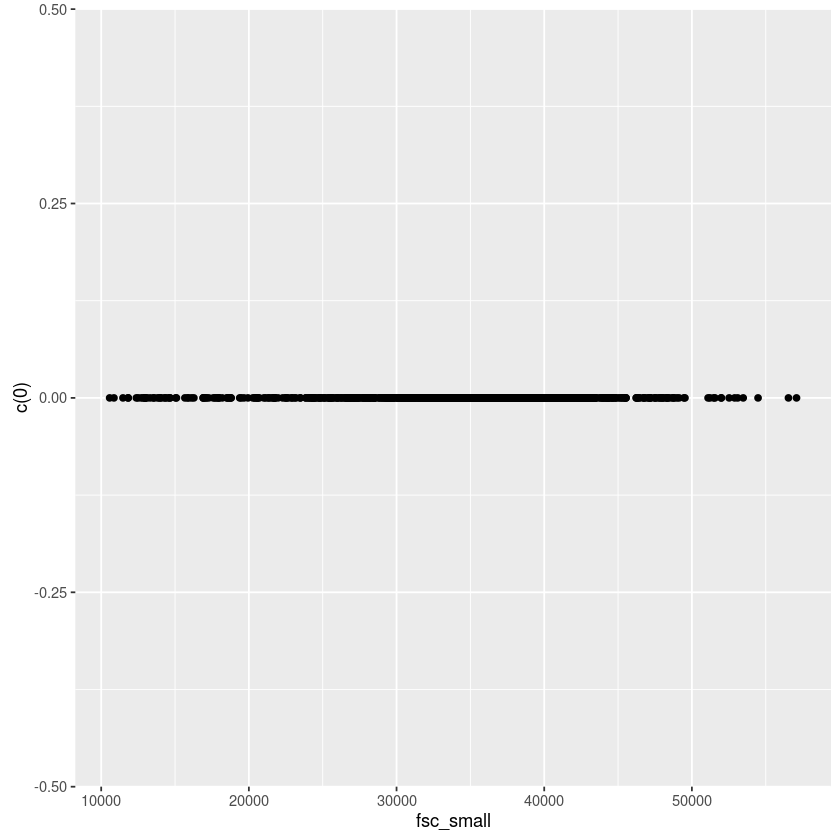

In [15]:
ggplot(data[sample(nrow(data), size = 1000),], aes(x = fsc_small, y = c(0))) + geom_point()

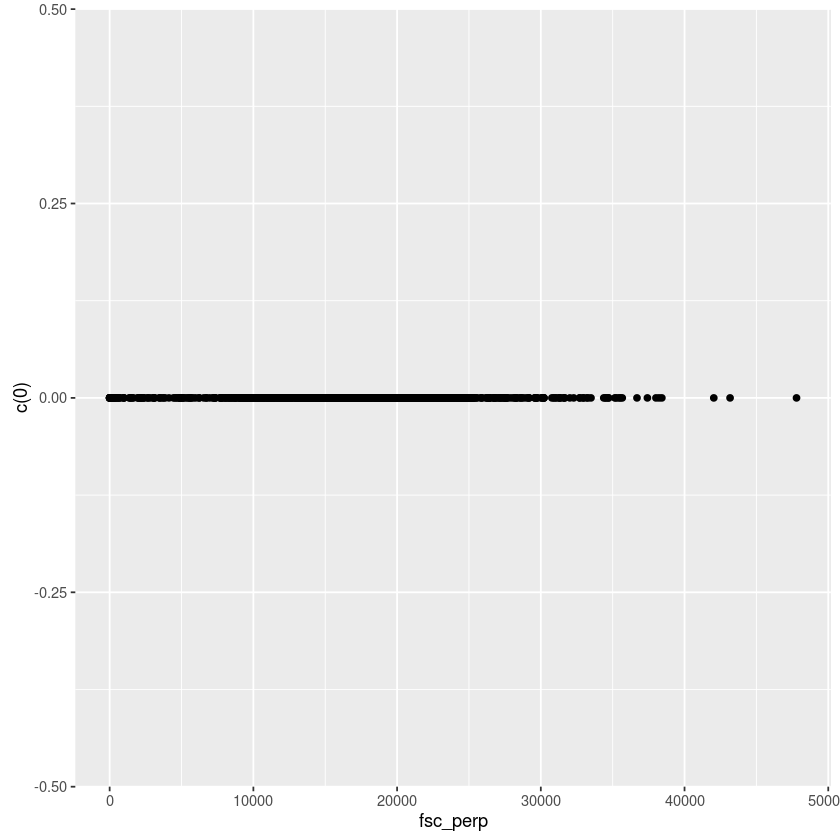

In [16]:
ggplot(data[sample(nrow(data), size = 1000),], aes(x = fsc_perp, y = c(0))) + geom_point()

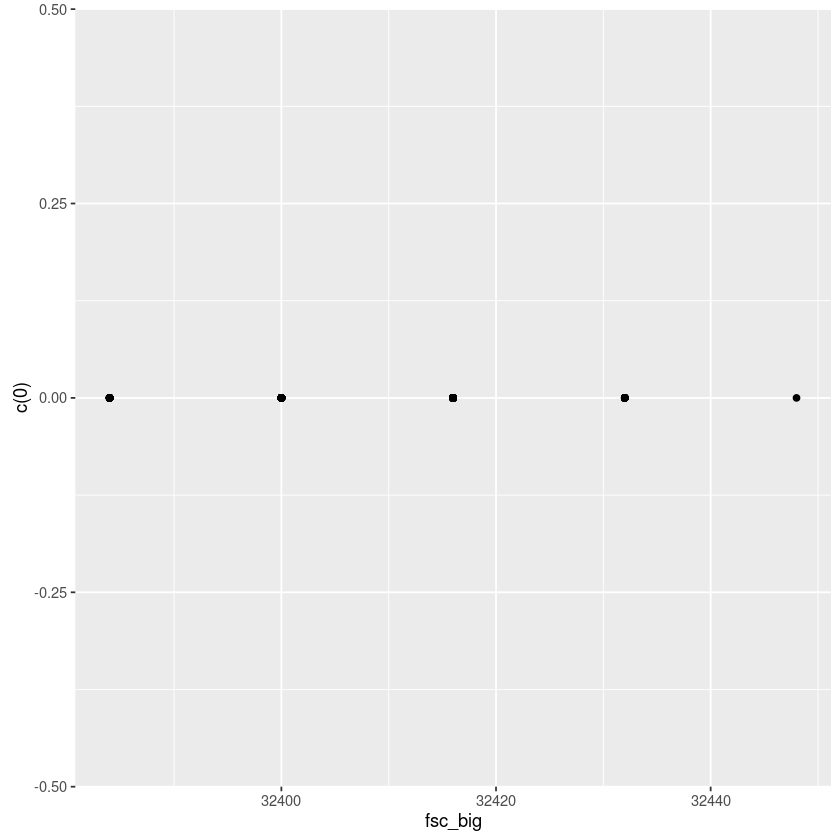

In [17]:
ggplot(data[sample(nrow(data), size = 1000),], aes(x = fsc_big, y = c(0))) + geom_point()

In [22]:
data <- data[data$file_id != 208,]
head(data)

,file_id,time,cell_id,d1,d2,fsc_small,fsc_perp,fsc_big,pe,chl_small,chl_big,pop
1,203,12,1,25344,27968,34677,14944,32400,2216,28237,5072,pico
2,203,12,4,12960,22144,37275,20440,32400,1795,36755,14224,ultra
3,203,12,6,21424,23008,31725,11253,32384,1901,26640,0,pico
4,203,12,9,7712,14528,28744,10219,32416,1248,35392,10704,ultra
5,203,12,11,30368,21440,28861,6101,32400,12989,23421,5920,synecho
6,203,12,15,30032,22704,31221,13488,32400,1883,27323,6560,pico


In [23]:
trainIndex = createDataPartition(data$pop, p = 0.5, list = FALSE)
train <- data[trainIndex,]
test <- data[trainIndex,]

In [26]:
model.svm <- svm(fol, data=train)
predictions.svm <- predict(model.svm, test, type = 'class')
mean(predictions.svm == test$pop)

[1] 0.9732229

In [27]:
mean(predictions.svm == test$pop) - 0.922813225699436

[1] 0.05040964